In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
from uatk_spc.builder import Builder
from uatk_spc.reader import Reader

### Input Data Paths

In [80]:
geo_boundaries_path="../data/external/boundaries/oa_leeds.geojson"
acbm_data_path="../data/outputs/36c777d445/legs_with_locations.parquet"
Cencus21_OA_data_path="../data/external/cencus/ODWP01EW_OA.csv"
Cencus21_MSOA_data_path="../data/external/cencus/ODWP01EW_MSOA.csv"
#MSOA_boundaries_path="../data/external/boundaries/MSOA_DEC_2021_EW_NC_v3_2768211653661228621.geojson"

<Axes: >

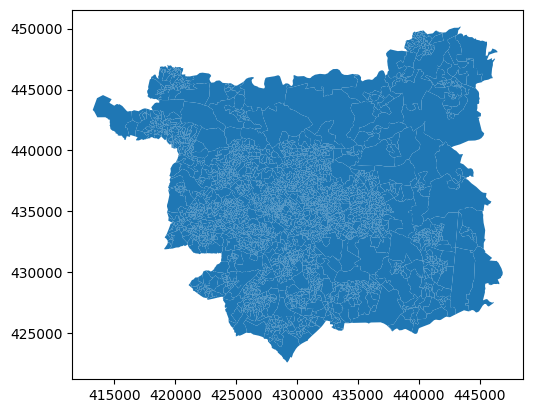

In [89]:
boundaries = gpd.read_file(geo_boundaries_path)
boundaries.plot()

<Axes: >

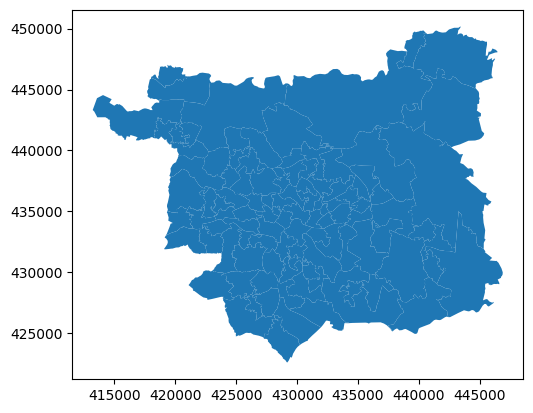

In [90]:
MSOA_boundaries=boundaries.dissolve(by='MSOA21CD')
MSOA_boundaries.plot()

In [91]:
MSOA_boundaries

,geometry,OBJECTID,OA21CD,GlobalID,LSOA21CD,LSOA21NM,MSOA21NM,LEP22CD1,LEP22NM1,LAD22CD,LAD22NM,rgn22cd,rgn22nm,ctry22cd,ctry22nm
MSOA21CD,,,,,,,,,,,,,,,
E02002330,"POLYGON ((439176.316 446904.131, 439048.115 44...",55616,E00058996,d0e5f055-f45a-4c73-ba31-72a00babdfe1,E01011702,Leeds 001D,Leeds 001,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02002331,"POLYGON ((439824.268 447781.097, 439846.716 44...",55595,E00058975,a99aff6e-3846-46e8-a00a-493c3f470420,E01011697,Leeds 002A,Leeds 002,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02002332,"POLYGON ((419465.000 445311.000, 419185.334 44...",55004,E00058339,239f6484-5a0a-4e03-86cb-045ee4dd76bd,E01011581,Leeds 003A,Leeds 003,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02002333,"POLYGON ((418604.775 444120.550, 418438.000 44...",54998,E00058333,e1295d1f-a2f3-41d6-a7c8-937c7c36e003,E01011572,Leeds 004C,Leeds 004,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02002334,"POLYGON ((444937.313 444639.906, 444928.976 44...",55588,E00058968,9df65ceb-2b55-471c-8e2d-aa803dfca3e5,E01011709,Leeds 005B,Leeds 005,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02002437,"POLYGON ((427596.093 424322.312, 427618.813 42...",54799,E00058126,b5da9cc9-e49f-4e9d-9f5b-a4d61278df1a,E01011535,Leeds 108A,Leeds 108,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02006852,"POLYGON ((427455.473 436298.086, 427186.000 43...",55515,E00058891,bd49b23f-805b-4dfa-8d58-e728f2ba239d,E01011690,Leeds 109C,Leeds 109,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England
E02006861,"POLYGON ((428682.183 435118.284, 428662.000 43...",54333,E00057628,38dd690f-4fd2-4e5a-9abb-cae5f1745891,E01011444,Leeds 110C,Leeds 110,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England


In [92]:
# generate OA to MSOA matching list
OA_to_MSOA_21 = boundaries[["OA21CD", "MSOA21CD"]].drop_duplicates()
OA_to_MSOA_21.set_index("OA21CD", inplace=True)
OA_to_MSOA_21

,MSOA21CD
OA21CD,
E00056750,E02002340
E00056751,E02002338
E00056752,E02002339
E00056753,E02002339
E00056754,E02002340
...,...
E00187149,E02006876
E00187150,E02002432
E00187151,E02002337


In [ ]:
OA_to_MSOA_21

## Read in the AcBM datasets

The dataset currently used is generated on 12/12/2024 for Leeds

In [5]:
acbm_data=pd.read_parquet("../data/outputs/36c777d445/legs_with_locations.parquet", engine='pyarrow')

In [6]:
# filter the data to only include work trips
acbm_data_work=acbm_data[acbm_data["purp"]=="work"]
acbm_data_work

,pid,hid,ozone,dzone,purp,origin activity,destination activity,mode,seq,tst,tet,duration,start_location_id,end_location_id,start_location_geometry_wkt,end_location_geometry_wkt
12,11,5,E00059028,None,work,home,work,car_passenger,1.0,1900-01-01 06:30:00,1900-01-01 06:34:00,0:04:00,None,None,None,None
15,12,5,E00057570,E00058739,work,escort,work,car,2.0,1900-01-01 06:34:00,1900-01-01 07:00:00,0:26:00,1338366450,1381546612,POINT (-1.5129058870428844 53.81732739735367),POINT (-1.474703422980641 53.85175150478472)
18,13,6,E00059028,E00059102,work,home,work,car,1.0,1900-01-01 08:30:00,1900-01-01 09:00:00,0:30:00,None,1397386050,None,POINT (-1.437978763907208 53.831371262924726)
30,19,8,E00059102,E00056971,work,escort,work,car,2.0,1900-01-01 08:00:00,1900-01-01 08:10:00,0:10:00,1671756810,377084374,POINT (-1.4220144369942826 53.84172919739339),POINT (-1.4471266040651745 53.87141888994728)
32,19,8,E00169783,E00056971,work,other,work,walk,4.0,1900-01-01 13:30:00,1900-01-01 13:45:00,0:15:00,60575406,377084374,POINT (-1.5479900578735037 53.80108316543812),POINT (-1.4471266040651745 53.87141888994728)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157754,794606,334832,E00057790,E00169583,work,home,work,car,1.0,1900-01-01 07:20:00,1900-01-01 07:40:00,0:20:00,1238900408,2671267350,POINT (-1.5320639571262564 53.781896143736425),POINT (-1.5933444255448457 53.82849087561576)
1157788,794621,334839,E00187098,E00165696,work,home,work,car,1.0,1900-01-01 08:35:00,1900-01-01 09:15:00,0:40:00,876772744,735155888,POINT (-1.5290247468603333 53.789487589857636),POINT (-1.6533095476728066 53.87043507716729)
1157797,794625,334842,E00057799,E00057577,work,home,work,car,1.0,1900-01-01 07:35:00,1900-01-01 07:50:00,0:15:00,1320836948,1313992658,POINT (-1.5213598592927677 53.76963697620853),POINT (-1.5186351332907104 53.816325638496004)
1157799,794626,334842,E00057799,None,work,home,work,car_passenger,1.0,1900-01-01 07:00:00,1900-01-01 07:20:00,0:20:00,1320836948,None,POINT (-1.5213598592927677 53.76963697620853),None


In [133]:
acbm_data_work=acbm_data_work.join(OA_to_MSOA_21, on="ozone").rename(columns={"MSOA21CD": "ozone_MSOA"}).join(OA_to_MSOA_21, on="dzone").rename(columns={"MSOA21CD": "dzone_MSOA"})

In [134]:
# Filter the ozone & dzone is not none
acbm_data_work=acbm_data_work[~acbm_data_work["ozone"].isna() & ~acbm_data_work["dzone"].isna()]

In [135]:
# Filter the home to work trips comparing with the cencus data
acbm_data_work=acbm_data_work[acbm_data_work["origin activity"]=="home"]
acbm_data_work

,pid,hid,ozone,dzone,purp,origin activity,destination activity,mode,seq,tst,tet,duration,start_location_id,end_location_id,start_location_geometry_wkt,end_location_geometry_wkt,ozone_MSOA,dzone_MSOA
18,13,6,E00059028,E00059102,work,home,work,car,1.0,1900-01-01 08:30:00,1900-01-01 09:00:00,0:30:00,None,1397386050,None,POINT (-1.437978763907208 53.831371262924726),E02002330,E02002351
35,20,8,E00059012,E00169786,work,home,work,car,1.0,1900-01-01 07:50:00,1900-01-01 08:35:00,0:45:00,None,952311802,None,POINT (-1.5385467208011925 53.79821785944038),E02002330,E02006875
43,24,9,E00059045,E00058296,work,home,work,car,1.0,1900-01-01 08:10:00,1900-01-01 08:42:00,0:32:00,None,262780150,None,POINT (-1.5182841630529933 53.864789509699904),E02002330,E02002341
45,27,11,E00059022,E00056971,work,home,work,walk,1.0,1900-01-01 07:30:00,1900-01-01 07:55:00,0:25:00,None,377084374,None,POINT (-1.4471266040651745 53.87141888994728),E02002330,E02002359
57,33,13,E00059016,E00058877,work,home,work,car,1.0,1900-01-01 07:05:00,1900-01-01 07:45:00,0:40:00,None,294189496,None,POINT (-1.520049852688877 53.806563321006514),E02002330,E02002393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157752,794605,334832,E00057790,E00057239,work,home,work,car,1.0,1900-01-01 07:20:00,1900-01-01 07:40:00,0:20:00,1238900408,1166563594,POINT (-1.5320639571262564 53.781896143736425),POINT (-1.5467417317175023 53.82775152739614),E02006876,E02002363
1157754,794606,334832,E00057790,E00169583,work,home,work,car,1.0,1900-01-01 07:20:00,1900-01-01 07:40:00,0:20:00,1238900408,2671267350,POINT (-1.5320639571262564 53.781896143736425),POINT (-1.5933444255448457 53.82849087561576),E02006876,E02006852
1157788,794621,334839,E00187098,E00165696,work,home,work,car,1.0,1900-01-01 08:35:00,1900-01-01 09:15:00,0:40:00,876772744,735155888,POINT (-1.5290247468603333 53.789487589857636),POINT (-1.6533095476728066 53.87043507716729),E02006876,E02002336
1157797,794625,334842,E00057799,E00057577,work,home,work,car,1.0,1900-01-01 07:35:00,1900-01-01 07:50:00,0:15:00,1320836948,1313992658,POINT (-1.5213598592927677 53.76963697620853),POINT (-1.5186351332907104 53.816325638496004),E02006876,E02002377


In [136]:
# deduplicate the data for only keep one commuting trip for the same person
acbm_data_work_unique=acbm_data_work.drop_duplicates("pid",keep="first")

In [139]:
# Generate the OD matrix from the ACBM data at OA level
OD_matrix_acbm_OA = acbm_data_work_unique.groupby("ozone").apply(lambda x: x.value_counts("dzone")).reset_index()
OD_matrix_acbm_OA

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_5022/1763523430.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  OD_matrix_acbm_OA = acbm_data_work_unique.groupby("ozone").apply(lambda x: x.value_counts("dzone")).reset_index()


,ozone,dzone,count
0,E00056750,E00169578,4
1,E00056750,E00058564,4
2,E00056750,E00187075,2
3,E00056750,E00057068,2
4,E00056750,E00057403,2
...,...,...,...
56407,E00187151,E00056823,1
56408,E00187151,E00056822,1
56409,E00187151,E00056768,1
56410,E00187151,E00187080,1


In [140]:
# Aggregate the OD matrix to MSOA level
OD_matrix_acbm_MSOA = acbm_data_work_unique.groupby("ozone_MSOA").apply(lambda x: x.value_counts("dzone_MSOA")).reset_index()
OD_matrix_acbm_MSOA

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_5022/4150659795.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  OD_matrix_acbm_MSOA = acbm_data_work_unique.groupby("ozone_MSOA").apply(lambda x: x.value_counts("dzone_MSOA")).reset_index()


,ozone_MSOA,dzone_MSOA,count
0,E02002330,E02002359,447
1,E02002330,E02002335,131
2,E02002330,E02002351,92
3,E02002330,E02006875,54
4,E02002330,E02002393,31
...,...,...,...
9202,E02006876,E02002362,1
9203,E02006876,E02002369,1
9204,E02006876,E02002423,1
9205,E02006876,E02002385,1


## Read in the Cencus 2021 Data

In [32]:
# Read the census data at MSOA level
Cencus21_MSOA = pd.read_csv(Cencus21_MSOA_data_path)

Cencus21_MSOA



,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E02000001,City of London 001,-8,Does not apply,-8,Does not apply,2653
1,E02000001,City of London 001,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",35
2,E02000001,City of London 001,E02000001,City of London 001,1,"Mainly working at or from home, No fixed place",3871
3,E02000001,City of London 001,E02000001,City of London 001,3,Working in the UK but not working at or from home,436
4,E02000001,City of London 001,E02000016,Barking and Dagenham 015,3,Working in the UK but not working at or from home,2
...,...,...,...,...,...,...,...
1856451,W02000428,Swansea 032,W02000418,Carmarthenshire 027,3,Working in the UK but not working at or from home,2
1856452,W02000428,Swansea 032,W02000422,Cardiff 048,3,Working in the UK but not working at or from home,5
1856453,W02000428,Swansea 032,W02000423,Cardiff 049,3,Working in the UK but not working at or from home,1
1856454,W02000428,Swansea 032,W02000428,Swansea 032,1,"Mainly working at or from home, No fixed place",2128


## Validate the flows at OA level

In [ ]:
# Read the census data at OA level

Cencus21_OA = pd.read_csv(Cencus21_OA_data_path)

Cencus21_OA


,Output Areas code,Output Areas label,OA of workplace code,OA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E00000001,E00000001,-8,Does not apply,-8,Does not apply,73
1,E00000001,E00000001,E00000001,E00000001,1,"Mainly working at or from home, No fixed place",64
2,E00000001,E00000001,E00004731,E00004731,3,Working in the UK but not working at or from home,1
3,E00000001,E00000001,E00006038,E00006038,3,Working in the UK but not working at or from home,1
4,E00000001,E00000001,E00013547,E00013547,3,Working in the UK but not working at or from home,1
...,...,...,...,...,...,...,...
10741180,W00010697,W00010697,W00010425,W00010425,3,Working in the UK but not working at or from home,1
10741181,W00010697,W00010697,W00010563,W00010563,3,Working in the UK but not working at or from home,1
10741182,W00010697,W00010697,W00010623,W00010623,3,Working in the UK but not working at or from home,1
10741183,W00010697,W00010697,W00010671,W00010671,3,Working in the UK but not working at or from home,1


In [61]:
# Filter the cencus data to case study area

Cencus21_OA_case_study_area = Cencus21_OA[Cencus21_OA["Output Areas code"].isin(boundaries["OA21CD"].unique())]
Cencus21_OA_case_study_area = Cencus21_OA_case_study_area[Cencus21_OA_case_study_area["OA of workplace code"].isin(boundaries["OA21CD"].unique())]
Cencus21_OA_case_study_area

,Output Areas code,Output Areas label,OA of workplace code,OA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
3208071,E00056750,E00056750,E00056750,E00056750,1,"Mainly working at or from home, No fixed place",56
3208072,E00056750,E00056750,E00056752,E00056752,3,Working in the UK but not working at or from home,2
3208073,E00056750,E00056750,E00056753,E00056753,3,Working in the UK but not working at or from home,8
3208074,E00056750,E00056750,E00056766,E00056766,3,Working in the UK but not working at or from home,2
3208075,E00056750,E00056750,E00056784,E00056784,3,Working in the UK but not working at or from home,1
...,...,...,...,...,...,...,...
9992534,E00187153,E00187153,E00187074,E00187074,3,Working in the UK but not working at or from home,1
9992535,E00187153,E00187153,E00187120,E00187120,3,Working in the UK but not working at or from home,1
9992536,E00187153,E00187153,E00187137,E00187137,3,Working in the UK but not working at or from home,1
9992537,E00187153,E00187153,E00187152,E00187152,3,Working in the UK but not working at or from home,11


In [63]:
# combine the cencus data with the ACBM data at OA level to compare the difference

Combine_Df_OA = pd.merge(Cencus21_OA_case_study_area, OD_matrix_acbm_OA, left_on= ["Output Areas code","OA of workplace code"], right_on=["ozone","dzone"], how="left").fillna(0)
Combine_Df_OA.drop(columns=["ozone","dzone",'Place of work indicator (4 categories) label'],inplace=True)
Combine_Df_OA.rename(columns={"Count": "Cencus_count","count": "ACBM_count"},inplace=True)
Combine_Df_OA


,Output Areas code,Output Areas label,OA of workplace code,OA of workplace label,Place of work indicator (4 categories) code,Cencus_count,ACBM_count
0,E00056750,E00056750,E00056750,E00056750,1,56,0.0
1,E00056750,E00056750,E00056752,E00056752,3,2,0.0
2,E00056750,E00056750,E00056753,E00056753,3,8,0.0
3,E00056750,E00056750,E00056766,E00056766,3,2,0.0
4,E00056750,E00056750,E00056784,E00056784,3,1,0.0
...,...,...,...,...,...,...,...
108784,E00187153,E00187153,E00187074,E00187074,3,1,0.0
108785,E00187153,E00187153,E00187120,E00187120,3,1,0.0
108786,E00187153,E00187153,E00187137,E00187137,3,1,0.0
108787,E00187153,E00187153,E00187152,E00187152,3,11,0.0


In [ ]:
# calculate the R^2, RMSE and MAE values at OA level for the comparison
 
sum(Combine_Df_OA["Cencus_count"])
sum(Combine_Df_OA["ACBM_count"])
print(
    "Census counts:",
    sum(Combine_Df_OA["Cencus_count"]),
    "\nCurrent ACBM counts:",
    int (sum(Combine_Df_OA["ACBM_count"]),)
    )

r2 = np.corrcoef(Combine_Df_OA["Cencus_count"], Combine_Df_OA["ACBM_count"])[0, 1] ** 2
print("The R^2 value is: ", r2)

rmse = np.sqrt(np.mean((Combine_Df_OA["Cencus_count"] - Combine_Df_OA["ACBM_count"]) ** 2))
print("The RMSE value is: ", rmse)

mes = np.mean(np.abs(Combine_Df_OA["Cencus_count"] - Combine_Df_OA["ACBM_count"]))
print("The MAE value is: ", mes)



Census counts: 326921 
Current ACBM counts: 86463
The R^2 value is:  0.005976117773372713
The RMSE value is:  11.364015603538766
The MAE value is:  2.8038680381288548


## Validate the flows at MSOA level

In [65]:
# Read the census data at OA level

Cencus21_MSOA = pd.read_csv(Cencus21_MSOA_data_path)

Cencus21_MSOA

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E02000001,City of London 001,-8,Does not apply,-8,Does not apply,2653
1,E02000001,City of London 001,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",35
2,E02000001,City of London 001,E02000001,City of London 001,1,"Mainly working at or from home, No fixed place",3871
3,E02000001,City of London 001,E02000001,City of London 001,3,Working in the UK but not working at or from home,436
4,E02000001,City of London 001,E02000016,Barking and Dagenham 015,3,Working in the UK but not working at or from home,2
...,...,...,...,...,...,...,...
1856451,W02000428,Swansea 032,W02000418,Carmarthenshire 027,3,Working in the UK but not working at or from home,2
1856452,W02000428,Swansea 032,W02000422,Cardiff 048,3,Working in the UK but not working at or from home,5
1856453,W02000428,Swansea 032,W02000423,Cardiff 049,3,Working in the UK but not working at or from home,1
1856454,W02000428,Swansea 032,W02000428,Swansea 032,1,"Mainly working at or from home, No fixed place",2128


In [68]:
# Filter the cencus data to case study area

Cencus21_MSOA_case_study_area = Cencus21_MSOA[Cencus21_MSOA["Middle layer Super Output Areas code"].isin(boundaries["MSOA21CD"].unique())]
Cencus21_MSOA_case_study_area = Cencus21_MSOA_case_study_area[Cencus21_MSOA_case_study_area["MSOA of workplace code"].isin(boundaries["MSOA21CD"].unique())]
Cencus21_MSOA_case_study_area

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
713972,E02002330,Leeds 001,E02002330,Leeds 001,1,"Mainly working at or from home, No fixed place",1572
713973,E02002330,Leeds 001,E02002330,Leeds 001,3,Working in the UK but not working at or from home,30
713974,E02002330,Leeds 001,E02002331,Leeds 002,3,Working in the UK but not working at or from home,366
713975,E02002330,Leeds 001,E02002332,Leeds 003,3,Working in the UK but not working at or from home,6
713976,E02002330,Leeds 001,E02002333,Leeds 004,3,Working in the UK but not working at or from home,2
...,...,...,...,...,...,...,...
1719013,E02006876,Leeds 112,E02006852,Leeds 109,3,Working in the UK but not working at or from home,6
1719014,E02006876,Leeds 112,E02006861,Leeds 110,3,Working in the UK but not working at or from home,8
1719015,E02006876,Leeds 112,E02006875,Leeds 111,3,Working in the UK but not working at or from home,471
1719016,E02006876,Leeds 112,E02006876,Leeds 112,1,"Mainly working at or from home, No fixed place",2243


In [97]:
distances = (
    MSOA_boundaries.rename_axis("Orig")
    .centroid.apply(
        lambda x: MSOA_boundaries.rename_axis("Dest").centroid.distance(x)
    )
    .stack()
    .reset_index()
)
distances.rename(columns={0: "Dist"}, inplace=True)
distances

,Orig,Dest,Dist
0,E02002330,E02002330,0.000000
1,E02002330,E02002331,3532.892984
2,E02002330,E02002332,20083.427194
3,E02002330,E02002333,19168.244335
4,E02002330,E02002334,5888.497237
...,...,...,...
11444,E02006876,E02002437,7329.451871
11445,E02006876,E02006852,7882.022965
11446,E02006876,E02006861,5685.936850
11447,E02006876,E02006875,2992.168008


In [153]:
# combine the cencus data with the ACBM data at MSOA level to compare the difference

Combine_Df_MSOA = pd.merge(Cencus21_MSOA_case_study_area, OD_matrix_acbm_MSOA, left_on= ["Middle layer Super Output Areas code","MSOA of workplace code"], right_on=["ozone_MSOA","dzone_MSOA"], how="left").fillna(0)
Combine_Df_MSOA.drop(columns=['Place of work indicator (4 categories) label',"ozone_MSOA","dzone_MSOA"],inplace=True)
Combine_Df_MSOA.rename(columns={"Count": "Cencus_count","count": "ACBM_count"},inplace=True)
Combine_Df_MSOA

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Cencus_count,ACBM_count
0,E02002330,Leeds 001,E02002330,Leeds 001,1,1572,0.0
1,E02002330,Leeds 001,E02002330,Leeds 001,3,30,0.0
2,E02002330,Leeds 001,E02002331,Leeds 002,3,366,0.0
3,E02002330,Leeds 001,E02002332,Leeds 003,3,6,0.0
4,E02002330,Leeds 001,E02002333,Leeds 004,3,2,0.0
...,...,...,...,...,...,...,...
10398,E02006876,Leeds 112,E02006852,Leeds 109,3,6,5.0
10399,E02006876,Leeds 112,E02006861,Leeds 110,3,8,4.0
10400,E02006876,Leeds 112,E02006875,Leeds 111,3,471,88.0
10401,E02006876,Leeds 112,E02006876,Leeds 112,1,2243,29.0


In [154]:
# Join the distances to the combined dataframe
Combine_Df_MSOA = pd.merge(Combine_Df_MSOA, distances, left_on=["Middle layer Super Output Areas code", "MSOA of workplace code"], right_on=["Orig", "Dest"], how="left")
Combine_Df_MSOA.drop(columns=["Orig", "Dest"], inplace=True)
Combine_Df_MSOA

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Cencus_count,ACBM_count,Dist
0,E02002330,Leeds 001,E02002330,Leeds 001,1,1572,0.0,0.000000
1,E02002330,Leeds 001,E02002330,Leeds 001,3,30,0.0,0.000000
2,E02002330,Leeds 001,E02002331,Leeds 002,3,366,0.0,3532.892984
3,E02002330,Leeds 001,E02002332,Leeds 003,3,6,0.0,20083.427194
4,E02002330,Leeds 001,E02002333,Leeds 004,3,2,0.0,19168.244335
...,...,...,...,...,...,...,...,...
10398,E02006876,Leeds 112,E02006852,Leeds 109,3,6,5.0,7882.022965
10399,E02006876,Leeds 112,E02006861,Leeds 110,3,8,4.0,5685.936850
10400,E02006876,Leeds 112,E02006875,Leeds 111,3,471,88.0,2992.168008
10401,E02006876,Leeds 112,E02006876,Leeds 112,1,2243,29.0,0.000000


In [155]:
# calculate the R^2, RMSE and MAE values at MSOA level for the comparison

sum(Combine_Df_MSOA["Cencus_count"])
sum(Combine_Df_MSOA["ACBM_count"])
print(
    "Census counts:",
    sum(Combine_Df_MSOA["Cencus_count"]),
    "\nCurrent ACBM counts:",
    int (sum(Combine_Df_MSOA["ACBM_count"]),)
    )

r2 = np.corrcoef(Combine_Df_MSOA["Cencus_count"], Combine_Df_MSOA["ACBM_count"])[0, 1] ** 2
print("The R^2 value is: ", r2)

rmse = np.sqrt(np.mean((Combine_Df_MSOA["Cencus_count"] - Combine_Df_MSOA["ACBM_count"]) ** 2))
print("The RMSE value is: ", rmse)

mes = np.mean(np.abs(Combine_Df_MSOA["Cencus_count"] - Combine_Df_MSOA["ACBM_count"]))
print("The MAE value is: ", mes)


Census counts: 326885 
Current ACBM counts: 98431
The R^2 value is:  0.02268671717234933
The RMSE value is:  172.01178789952573
The MAE value is:  26.782082091704314


In [156]:
Combine_Df_MSOA

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Cencus_count,ACBM_count,Dist
0,E02002330,Leeds 001,E02002330,Leeds 001,1,1572,0.0,0.000000
1,E02002330,Leeds 001,E02002330,Leeds 001,3,30,0.0,0.000000
2,E02002330,Leeds 001,E02002331,Leeds 002,3,366,0.0,3532.892984
3,E02002330,Leeds 001,E02002332,Leeds 003,3,6,0.0,20083.427194
4,E02002330,Leeds 001,E02002333,Leeds 004,3,2,0.0,19168.244335
...,...,...,...,...,...,...,...,...
10398,E02006876,Leeds 112,E02006852,Leeds 109,3,6,5.0,7882.022965
10399,E02006876,Leeds 112,E02006861,Leeds 110,3,8,4.0,5685.936850
10400,E02006876,Leeds 112,E02006875,Leeds 111,3,471,88.0,2992.168008
10401,E02006876,Leeds 112,E02006876,Leeds 112,1,2243,29.0,0.000000


In [163]:
Combine_Df_MSOA['diff'] = Combine_Df_MSOA['Cencus_count'] - Combine_Df_MSOA['ACBM_count']
Combine_Df_MSOA['diff_abs'] = abs(Combine_Df_MSOA['diff'])
Combine_Df_MSOA

,Middle layer Super Output Areas code,Middle layer Super Output Areas label,MSOA of workplace code,MSOA of workplace label,Place of work indicator (4 categories) code,Cencus_count,ACBM_count,Dist,diff,diff_abs
0,E02002330,Leeds 001,E02002330,Leeds 001,1,1572,0.0,0.000000,1572.0,1572.0
1,E02002330,Leeds 001,E02002330,Leeds 001,3,30,0.0,0.000000,30.0,30.0
2,E02002330,Leeds 001,E02002331,Leeds 002,3,366,0.0,3532.892984,366.0,366.0
3,E02002330,Leeds 001,E02002332,Leeds 003,3,6,0.0,20083.427194,6.0,6.0
4,E02002330,Leeds 001,E02002333,Leeds 004,3,2,0.0,19168.244335,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
10398,E02006876,Leeds 112,E02006852,Leeds 109,3,6,5.0,7882.022965,1.0,1.0
10399,E02006876,Leeds 112,E02006861,Leeds 110,3,8,4.0,5685.936850,4.0,4.0
10400,E02006876,Leeds 112,E02006875,Leeds 111,3,471,88.0,2992.168008,383.0,383.0
10401,E02006876,Leeds 112,E02006876,Leeds 112,1,2243,29.0,0.000000,2214.0,2214.0


In [157]:
# average travel distance calcuation

Census_distance = sum(Combine_Df_MSOA["Cencus_count"] * Combine_Df_MSOA["Dist"]) / sum(
    Combine_Df_MSOA["Cencus_count"]
)

ACBM_distance = sum(Combine_Df_MSOA["ACBM_count"] * Combine_Df_MSOA["Dist"]) / sum(
    Combine_Df_MSOA["ACBM_count"]
)

print(
    "ACBM  average travel distance",
    ACBM_distance,
    "\n Census average travel distance",
    Census_distance,
)

ACBM  average travel distance 7941.936440896207 
 Census average travel distance 2553.8742505636333


In [166]:
sum_dj = Combine_Df_MSOA.groupby("Middle layer Super Output Areas code").agg(
    {"Cencus_count": "sum", "ACBM_count": "sum",'diff': 'sum','diff_abs': 'sum'}
)
sum_dj["diff_percentage"] = sum_dj["diff"] / sum_dj["Cencus_count"]
sum_dj["diff_per_abs"] = abs(sum_dj["diff_abs"]) / sum_dj["Cencus_count"]


sum_dj

,Cencus_count,ACBM_count,diff,diff_abs,diff_percentage,diff_per_abs
Middle layer Super Output Areas code,,,,,,
E02002330,2485,1057.0,1428.0,2892.0,0.574648,1.163783
E02002331,2426,836.0,1590.0,2746.0,0.655400,1.131904
E02002332,2412,823.0,1589.0,2317.0,0.658789,0.960614
E02002333,3091,1204.0,1887.0,3003.0,0.610482,0.971530
E02002334,2895,1035.0,1860.0,3110.0,0.642487,1.074266
...,...,...,...,...,...,...
E02002437,2548,1010.0,1538.0,2032.0,0.603611,0.797488
E02006852,5508,1528.0,3980.0,4888.0,0.722585,0.887436
E02006861,4196,934.0,3262.0,3846.0,0.777407,0.916587


- • absolute map flow differences:

$$
Gi=\sum\limits_{j}(|(T_{ij}-T^{obs}_{ij})|)
$$


<Axes: title={'center': 'Absolute value difference in flow between SPC and Census'}>

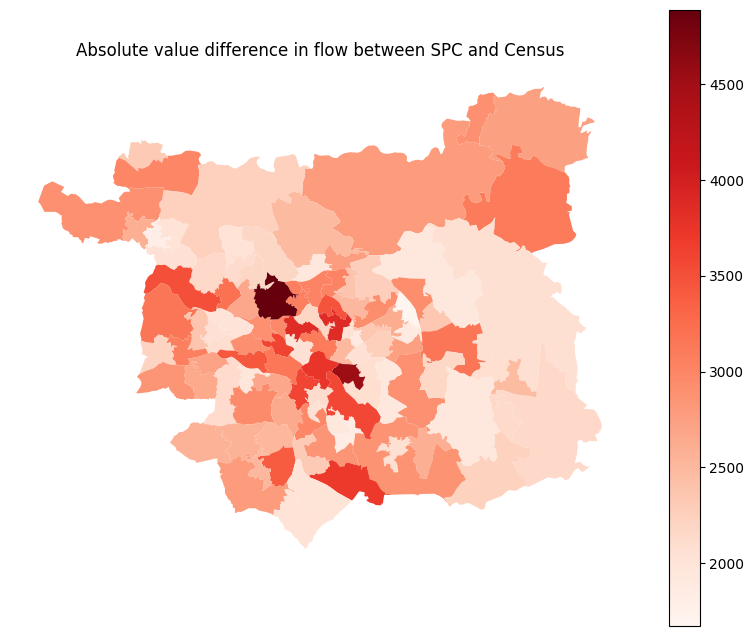

In [165]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis("off")
plt.title("Absolute value difference in flow between SPC and Census")
MSOA_boundaries.join(sum_dj, on="MSOA21CD").plot(
    column="diff_abs", ax=ax, legend=True, cmap="Reds"
)

- • absolute map percentage differences:

$$
Gi=\sum\limits_{j}(|(T_{ij}-T^{obs}_{ij})|)/\sum\limits_{lk} T^{obs}_{lk}
$$


<Axes: title={'center': 'Absolute percentage difference in flow between SPC and Census'}>

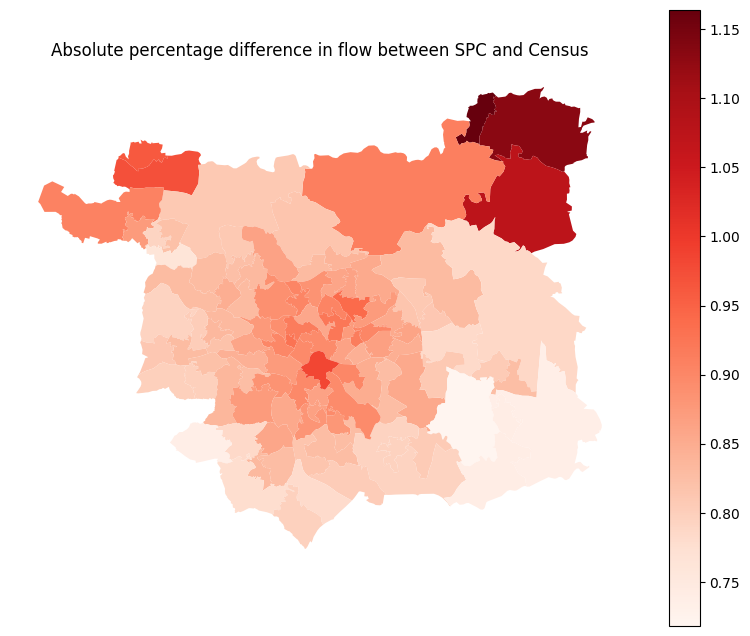

In [168]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis("off")
plt.title("Absolute percentage difference in flow between SPC and Census")
MSOA_boundaries.join(sum_dj, on="MSOA21CD").plot(
    column="diff_per_abs", ax=ax, legend=True, cmap="Reds"
)